# 단순 선형회귀분석 경사하강법 코드 구현

$$
    \hat{y} = wx + b
$$

<div align="center">
    <img src="https://www.dropbox.com/scl/fi/iclq97okuwh72z4ycs7oj/001.png?rlkey=epz1h9ve0qs65gz6fm2oipv2e&dl=1" width=30%>
</div>

**목표: 오차를 최소한으로 줄이자 $\rightarrow$ 평균오차제곱합을 최소화하자**

\begin{align*}
    MSE
    &= \dfrac{1}{n}\sum_{i=1}^n (\hat{y}_i-y_i)^2\\
    &= \dfrac{1}{n}\sum_{i=1}^n (wx_i + b-y_i)^2
\end{align*}

<div align="center">
    <img src="https://www.dropbox.com/scl/fi/jlg2sx1xsdeim4tfntms9/002.png?rlkey=uq9ihuf1o18lsmvqsm8i5kgo1&dl=1" width=30%>
</div>

\begin{align*}
    \dfrac{\partial MSE}{\partial w}
    &= \dfrac{2}{n}\sum_{i=1}^n x_i(wx_i + b - y_i)
    =\dfrac{2}{n}\sum_{i=1}^n x_i(\hat{y} - y_i)\\
    \dfrac{\partial MSE}{\partial b}
    &= \dfrac{2}{n}\sum_{i=1}^n (wx_i + b - y_i)
    = \dfrac{2}{n}\sum_{i=1}^n (\hat{y} - y_i)
\end{align*}

❓ 왜 가중치의 기울기의 영향을 받아야 할까?
* 손실함수의 최솟값으로 가는 길의 특징은 기울기가 점점 줄어든다는 것이다.
* 즉, 현재 매개변수 값에 대한 기울기가 매우 크면 아직 최솟값으로 가는 길이 많이 남았다는 것이고,
    기울기가 매우 작으면 최솟값에 거의 다 왔다는 의미이다.

$w$ 업데이트

$$
    w - \left\{LR \times x\cdot (\hat{y}-y)\text{의 평균}\right\}
$$

$b$ 업데이트

$$
    b - \left\{LR \times (\hat{y}-y)\text{의 평균}\right\}
$$

## 1. 데이터 생성

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
W_true = 0.2
b_true = 0.5
e = np.random.randn(100)* 0.05      # 노이즈 추가

X = np.random.randn(100)
Y = W_true * X + b_true + e

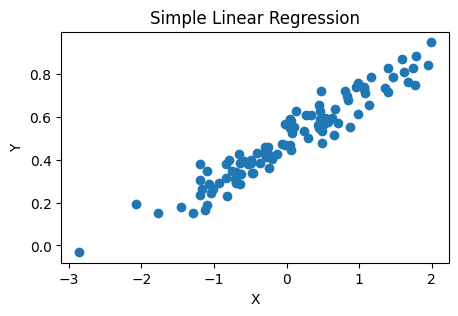

In [8]:
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X, Y)
ax.set_title("Simple Linear Regression")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

## 2. 경사하강법 구현

$w$ 업데이트

$$
    w - \left\{LR \times x\cdot (\hat{y}-y)\text{의 평균}\right\}
$$

$b$ 업데이트

$$
    b - \left\{LR \times (\hat{y}-y)\text{의 평균}\right\}
$$

In [20]:
# 매개변수(w, b)의 초기값을 설정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)

print(f"W: {W}, b: {b}")

W: 0.9294323106400291, b: 0.31258623329006396


Epoch: 0, W: 0.836680721687, b: 0.31616362177487145, Loss: 0.4783132835368143


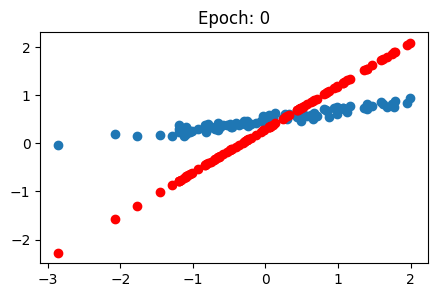

Epoch: 10, W: 0.446312299657962, b: 0.4190852478222595, Loss: 0.07540349013338843


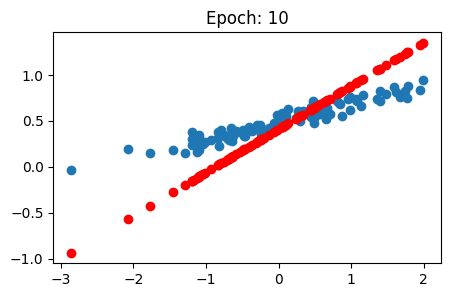

Epoch: 20, W: 0.294667186603911, b: 0.46155227541694344, Loss: 0.014104025128858819


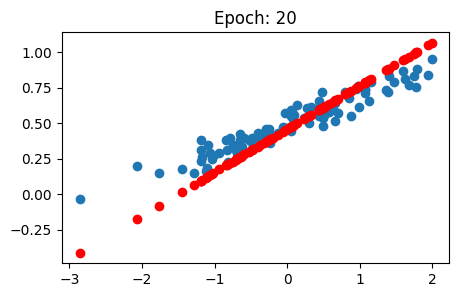

Epoch: 30, W: 0.23571644440685002, b: 0.4789167556105751, Loss: 0.00476983269523817


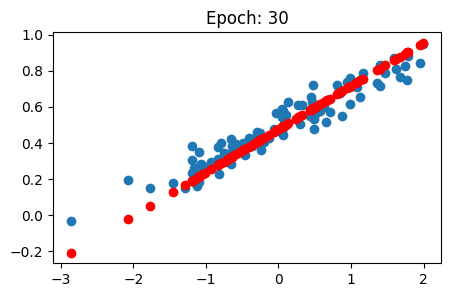

In [26]:
# 초기값
W = 0.9
b = 0.3

# 경사하강법
## 하이퍼파라미터
epochs = 100
lr = 0.1
loss_history = []

## 반복
for epoch in range(epochs):
    ## yhat 을 구한다 (yhat = W * x + b)
    yhat = W * X + b
    ## w_grad : x(yhat - y)의 평균
    ## b_grad : (yhat - y)의 평균
    w_grad = np.mean(X * (yhat - Y))
    b_grad = np.mean(yhat - Y)

    ## 가중치 업데이트
    ### w - lr * w_grad
    ### b - lr * b_grad
    W = W - lr * w_grad
    b = b - lr * b_grad

    ## loss = MSE = 평균오차제곱합 = (yhat - y)^2 평균
    loss = np.mean((yhat - Y) ** 2)

    ## loss를 loss_history에 넣는다
    loss_history.append(loss)

    ## Early Stop 조건 걸기
    error = np.abs(yhat - Y).mean()
    if error < 0.05:
        break

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, W: {W}, b: {b}, Loss: {loss}")

        # 그림 그리기
        plt.figure(figsize=(5,3))
        plt.scatter(X, Y)
        plt.scatter(X, yhat, color="red")
        plt.title(f"Epoch: {epoch}")
        plt.show()

## 3. 손실함수 그리기

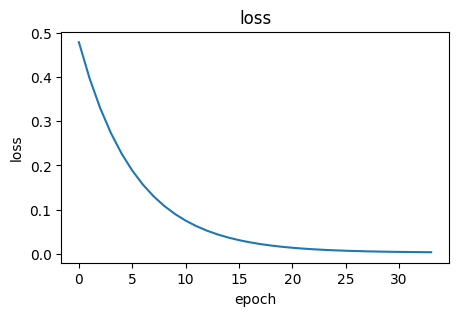

In [27]:
plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()